## Summary notes

Initialise a Pandas `Series` with a `DatetimeIndex` or `PeriodIndex` to represent a time series.

Data was sourced from Rdatasets[^1] via StatsModels[^2].

When initialising the `Series`:

- pass a NumPy `array` to the `data` argument
- pass an actual argument to the `name` argument
    - this is useful when plotting the time series
- annual or monthly time series: set a `DatetimeIndex` with `date_range`[^3]
- quarterly time series: set a `PeriodIndex` with `period_range`[^4]

This note is split into three sections, dealing with annual, monthly, and quarterly time series.
The general workflow for each section is:

 1. Load the data
 2. Identify the date of the initial observation
 3. Initialise the `Series`
 4. Plot the time series

There is currently an issue with plotting a `Series` with a `PeriodIndex` using Seaborn, so we instead use the `plot` method of `Series` for quarterly data.[^5]

## Dependencies

In [1]:
import pandas as pd
from statsmodels import datasets
from matplotlib import pyplot as plt
import seaborn as sns

Set the graphing defaults.
(This is optional.)

In [2]:
sns.set_theme()

## Main

### Annual time series

Load the data.

In [3]:
bomregions = datasets.get_rdataset('bomregions', package='DAAG', cache=True)
bomregions.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       109 non-null    int64  
 1   eastAVt    99 non-null     float64
 2   seAVt      99 non-null     float64
 3   southAVt   99 non-null     float64
 4   swAVt      99 non-null     float64
 5   westAVt    99 non-null     float64
 6   northAVt   99 non-null     float64
 7   mdbAVt     99 non-null     float64
 8   auAVt      99 non-null     float64
 9   eastRain   109 non-null    float64
 10  seRain     109 non-null    float64
 11  southRain  109 non-null    float64
 12  swRain     109 non-null    float64
 13  westRain   109 non-null    float64
 14  northRain  109 non-null    float64
 15  mdbRain    109 non-null    float64
 16  auRain     109 non-null    float64
 17  SOI        109 non-null    float64
 18  co2mlo     50 non-null     float64
 19  co2law     79 non-null     float64
 20  CO2       

Identify the initial year.

In [4]:
bomregions.data['Year'].head(1)

0    1900
Name: Year, dtype: int64

Initialise the annual `Series`.

In [5]:
ts_south_rain = pd.Series(
    data=bomregions.data['southRain'].to_numpy(),
    name='SOUTHERN RAINFALL',
    index=pd.date_range(
        start='1900',
        periods=bomregions.data['southRain'].size,
        freq='A-DEC',
        name='YEAR'
    )
)
ts_south_rain.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 109 entries, 1900-12-31 to 2008-12-31
Freq: A-DEC
Series name: SOUTHERN RAINFALL
Non-Null Count  Dtype  
--------------  -----  
109 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


Plot the time series.

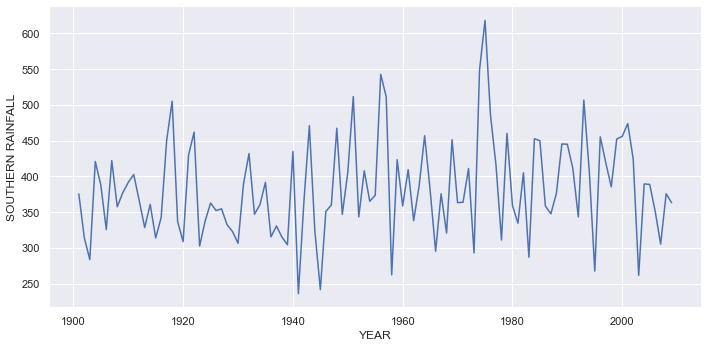

In [6]:
sns.relplot(
    x=ts_south_rain.index,
    y=ts_south_rain,
    kind='line',
    aspect=2
)
plt.show()

### Monthly time series

Load the data.

In [7]:
elecequip = datasets.get_rdataset('elecequip', package='fpp2', cache=True)
elecequip.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    195 non-null    float64
 1   value   195 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


Identify the initial month.

In [8]:
elecequip.data['time'].head(1)

0    1996.0
Name: time, dtype: float64

Initialise the monthly `Series`.

In [9]:
ts_elecequip = pd.Series(
    data=elecequip.data['value'].to_numpy(),
    name='NEW ORDERS INDEX',
    index=pd.date_range(
        start='1996-01',
        periods=elecequip.data['value'].size,
        freq='M',
        name='MONTH'
    )
)
ts_elecequip.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 195 entries, 1996-01-31 to 2012-03-31
Freq: M
Series name: NEW ORDERS INDEX
Non-Null Count  Dtype  
--------------  -----  
195 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


Plot the monthly time series.

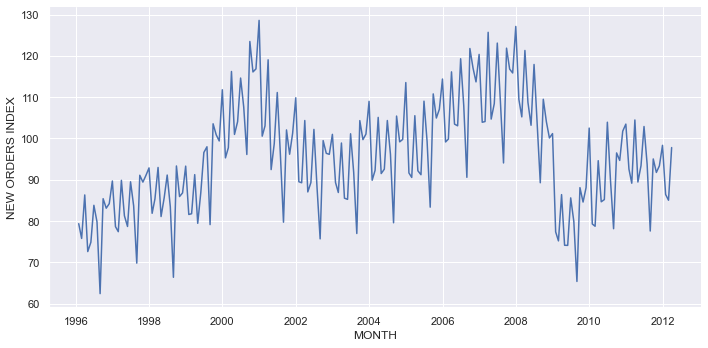

In [10]:
sns.relplot(
    x=ts_elecequip.index,
    y=ts_elecequip,
    kind='line',
    aspect=2
)
plt.show()

### Quarterly time series

Load the data.

In [11]:
macrodat = datasets.get_rdataset('Macrodat', package='Ecdat', cache=True)
macrodat.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lhur    168 non-null    float64
 1   punew   168 non-null    float64
 2   fyff    168 non-null    float64
 3   fygm3   168 non-null    float64
 4   fygt1   168 non-null    float64
 5   exruk   168 non-null    float64
 6   gdpjp   162 non-null    float64
dtypes: float64(7)
memory usage: 9.3 KB


Identify the initial quarter.

According to the [documentation](https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Macrodat.html), the initial quarter is the first quarter of 1959.

Initialise the quarterly `Series`.

Note that we use a `period_range`, not a `date_range`.

In [12]:
ts_exruk = pd.Series(
    data=macrodat.data['exruk'].to_numpy(),
    name='USD-GBP EXCHANGE RATE',
    index=pd.period_range(
        start='1959-01-01',
        periods=macrodat.data['exruk'].size,
        freq='Q',
        name='QUARTER'
    )
)
ts_exruk.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 168 entries, 1959Q1 to 2000Q4
Freq: Q-DEC
Series name: USD-GBP EXCHANGE RATE
Non-Null Count  Dtype  
--------------  -----  
168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


Plot the quarterly time series.

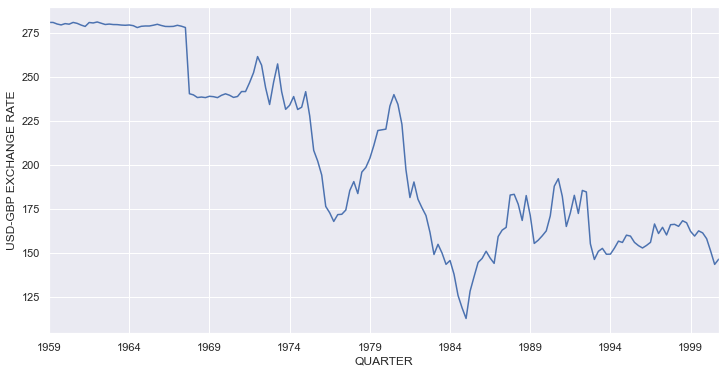

In [13]:
ts_exruk.plot(kind='line', figsize=(12, 6), ylabel=ts_exruk.name)
plt.show()

## Footnotes

[^1]: Arel-Bundock V (2022). Rdatasets: A collection of datasets originally distributed in various R packages. R package version 1.0.0, https://vincentarelbundock.github.io/Rdatasets.
[^2]: See [The Datasets Package](https://www.statsmodels.org/devel/datasets/index.html) (StatsModels)
[^3]: See [pandas.date_range](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html) (Pandas)
[^4]: See [pandas.period_range](https://pandas.pydata.org/docs/reference/api/pandas.period_range.html) (Pandas)
[^5]: See [pandas.Series.plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)